# <font color="#2809a6">**Entrainement d'un réseau de neurone pour jouer au Go**</font>

<b><font color="#2809a6">Sophie mendes</b>
<br/>Juillet 2025 </font>



## Présentation du projet

Nous allons développer et entraîner un réseau de neurones afin qu'il puisse par la suite jouer au Go.

<br/>

## Métriques utilisées

La performance de notre réseau sera mesurée à travers plusieurs métriques :

* **Mean Squared Error** : (MSE) évalue la probabilité de victoire
* **Policy categorical accuracy** : évalue la précision d'un modèle de réseau de neurones dans le contexte de classification catégorique, ici appliquée au Go elle mesure la proportion de fois où le modèle a prévu la bonne action (le bon coup) parmi les 361 possibles (correspondant aux 19*19 intersections du plateau de Go).

<br/>

## Contraintes imposées

L'unique contrainte imposée à notre réseau de neurones est la nombre de paramètres qui doit rester inférieur à 100 000.

<br/>

## Démarche suivie

À partir du réseau de neurones initial, plusieurs architectures ont été testées. Celle qui a obtenu les meilleurs résultats selon les métriques définies a été retenue.

Une fois cette architecture sélectionnée, l’étape suivante a consisté à déterminer la fonction de perte (loss) et le taux d’apprentissage (learning rate) les plus adaptés.

Ensuite, une analyse fine des hyperparamètres a été menée : chacun a été modifié individuellement afin d’évaluer son impact — positif ou négatif — sur les performances du modèle.

Le résultat final représente donc un compromis optimal entre :

* une architecture et un ensemble d’hyperparamètres peu coûteux en nombre de paramètres (moins de 100 000),
* des performances élevées sur les métriques choisies,
et un temps d’exécution raisonnable, respectant les contraintes budgétaires allouées à l’entraînement.

Une fois tous ces éléments définis (architecture, loss, learning rate, hyperparamètres), il a suffi de lancer l’entraînement sur une nombre d'epoch suffisament grand et dans la limite du budget disponible pour que l'apprentissage soit le plus complet possible.

<br/>

## Principe de l'entrainement

Le principe du réseau de neurones appliqué au jeu de Go que nous allons développer repose sur une combinaison de deux réseaux de neurones profonds, chacun jouant un rôle spécifique dans la prise de décision :

* **Réseau de politique** (policy network) :
Il prédit le prochain coup à jouer. Il prend l’état actuel du plateau et donne une probabilité pour chaque coup possible. Il sert à réduire l’espace de recherche en se concentrant sur les coups prometteurs.

* **Réseau de valeur** (value network) :
Il estime la probabilité de gagner à partir d’une position donnée, sans jouer la partie jusqu’au bout. Il permet d’évaluer la qualité d’une position.

L'apprentissage du réseau de neurones se fera par renforcement, il joue contre lui-même des millions de parties pour affiner sa stratégie et découvrir des coups innovants à partir d'1 million de parties auto-générées par Katago.

Le réseau doit apprendre à prédire le prochain coup à jouer dans une position donnée sur le plateau de Go.

<br/>

## Architectures testées

* **Residual Network** : Les ResNet (Residual Networks) sont des réseaux de neurones profonds qui utilisent des connexions résiduelles pour faciliter l’apprentissage. <br/>Afin de mieux propager l'information et le gradient, rendant l'entraînement plus efficace, au lieu d’apprendre une transformation complète, ils apprennent seulement la différence entre l’entrée et la sortie attendue. Cela se fait via une connexion directe entre l’entrée et la sortie d’un bloc de couches : Sortie = F(x) + x

* **Mobile network** : Les Mobile Networks sont des architectures de réseaux de neurones conçues pour être légères, rapides.<br/>Elles utilisent des convolutions séparables en profondeur (depthwise separable convolutions) pour réduire drastiquement le nombre de paramètres et les calculs tout en conservant de bonnes performances. Ellse se décomposent en 2 étapes :
  * Convolution depthwise : applique un filtre par canal (réduction du coût).
  * Convolution pointwise (1x1) : combine les canaux (reconstruction de l'information).

* **Convnext** : Les ConvNeXt sont des architectures de réseaux de neurones convolutifs modernes, conçues pour combiner la puissance des CNN traditionnels avec les bonnes pratiques des Transformers. <br/>ConvNeXt reprend la structure des ResNet, mais l’optimise en intégrant des techniques issues des Transformers (comme dans Vision Transformers - ViT), tout en restant purement convolutionnel.<br/>Les ajustements effectués par les réseaux Convnext par rapport aux CNNs classiques sont :
 * Utilisation de blocs résiduels simplifiés.
 * Remplacement des activations ReLU par GELU (fonction d’activation plus douce).
 * Normalisation LayerNorm au lieu de BatchNorm.
 * Utilisation de convolutions de grande taille (par exemple 7x7) pour capturer un contexte plus large.

<br/>

## Hyperparamètres en jeu

Les hyperparamètres sont des variables configurables manuellement avant l'entraînement d'un modèle, qui contrôle son comportement d'apprentissage, sa structure ou son optimisation.

Nous allons jouer sur plusieurs hyperparamètres afin de trouver la meilleure combinaison possible.

<br/>

## En résumé

Nous allons donc chercher à remplir le tableau suivant avec les valeurs qui donneront à la fois la valeur la plus basse de MSE et la plus haute de la policy categorical loss.

Le tableau est remplie avec les données et paramètres initiaux du réseau de neurones. Chaque changement sera visible en vert.


Nous garderons toujours un oeil sur le nombre de paramètres afin de nous assurer qu'à chaque changement, on reste bien dans le périmètre des 100 000 parametres imposé du projet.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_summary_table(architecture = "", loss= "" , lr= "", filters= "" , couches = "",  epochs= "", params= ""):
    data = {
        "Architecture": [architecture],
        "Loss": [loss],
        "Learning rate": [lr],
        "Nb de filtres": [filters],
        "Nb de couches": [couches],
        "Nb d'epochs": [epochs],
        "Nb paramètres": [params]
    }
    df = pd.DataFrame(data)

    fig, ax = plt.subplots(figsize=(12, 2))
    ax.axis('off')

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        loc='center',
        cellLoc='center'
    )

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(color='white', weight='bold')
            cell.set_facecolor('darkblue')
        else:
            cell.set_facecolor('#f2f2f2')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)

    plt.title("Finetuning réseau de neurones joueur de GO", pad=10, fontsize=14, fontweight='bold', color='darkblue')
    plt.tight_layout()
    plt.show()


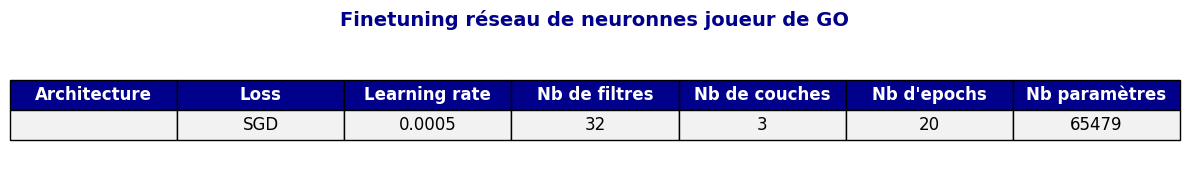

In [ ]:
plot_summary_table("","SGD",0.0005,32,3,20,65479)

# Recherche de la meilleure architecture

Nous allons entrainer le réseau de neurones avec les différentes architectures, d'abbord avec l'architecture initiale puis avec une architecteure ResNet, MobileNet et enfin Convnext et comparer les MSE et Policy categorical accuracy obtenus.

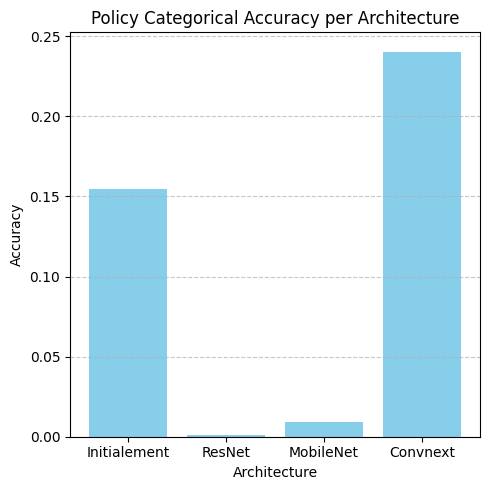

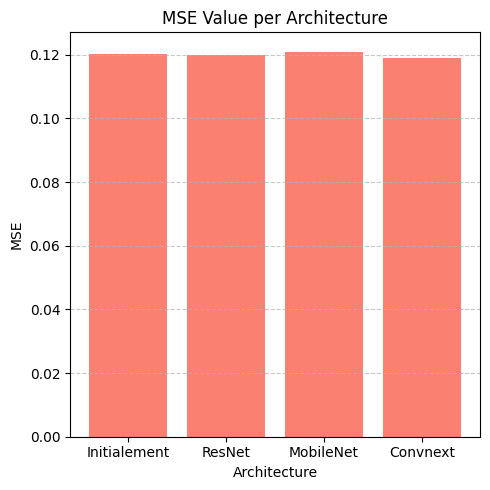

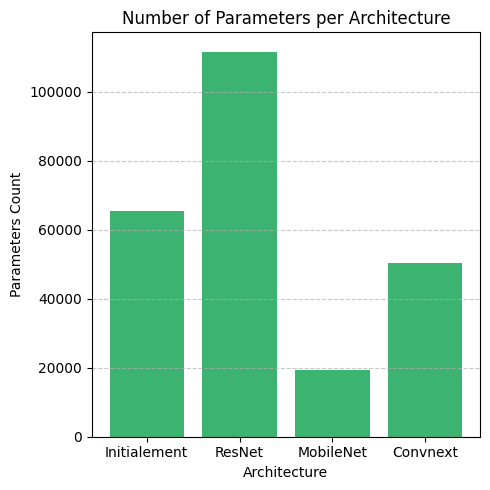

In [ ]:
# On crée DataFrame avec les données observées après tests
data = {
    "Architectures": ["Initialement", "ResNet", "MobileNet", "Convnext"],
    "Policy categorical accuracy": [0.1544, 0.001, 0.009, 0.2404],
    "MSE value": [0.1203, 0.1199, 0.121, 0.119],
    "Nb paramètres": [65479, 111719, 19239, 50471]
}

df = pd.DataFrame(data)

# Plot 1: Policy categorical accuracy
plt.figure(figsize=(5, 5))
plt.bar(df["Architectures"], df["Policy categorical accuracy"], color='skyblue')
plt.title("Policy Categorical Accuracy per Architecture")
plt.ylabel("Accuracy")
plt.xlabel("Architecture")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: MSE Value
plt.figure(figsize=(5, 5))
plt.bar(df["Architectures"], df["MSE value"], color='salmon')
plt.title("MSE Value per Architecture")
plt.ylabel("MSE")
plt.xlabel("Architecture")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 3: Number of Parameters
plt.figure(figsize=(5, 5))
plt.bar(df["Architectures"], df["Nb paramètres"], color='mediumseagreen')
plt.title("Number of Parameters per Architecture")
plt.ylabel("Parameters Count")
plt.xlabel("Architecture")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nous constatons que bien pour avec seulement 20 epochs d'entraînement toutes les architectures se valent quant au MSE obtenu, c'est l'architecture Convnext est celle avec laquelle nous obtenons la meilleure valeure de la Policy categorical accuracy.

C'est également celle qui laisse envisager le plus de possibilité étant donné le nombre de ses paramètres en jeu : 50471.

**Nous allons donc entrainer notre jeu de GO avec un réseau de neurones basé sur une architecture Convnext.**



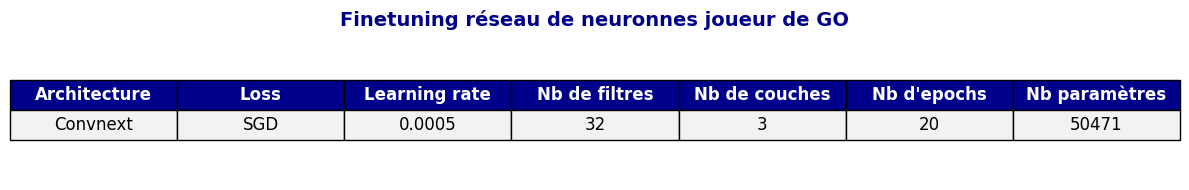

In [ ]:
plot_summary_table("Convnext","SGD",0.0005,32,3,20, 50471)

# Recherche de la loss et du learing rate

## Recherche de la loss la plus efficace

Voici les résulats obtenus en modifiant uniquement la loss utilisée pour l'entraînement de notre réseau de neurones :

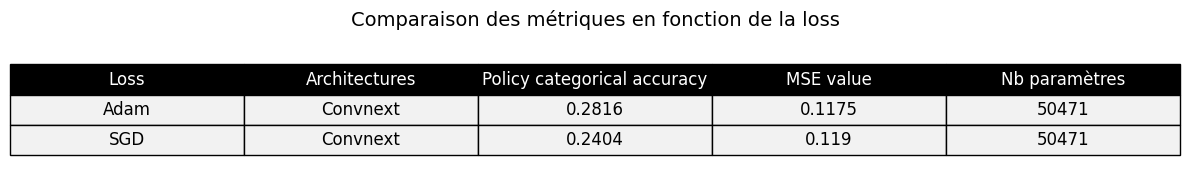

In [ ]:

data = {
    "Loss": ["Adam", "SGD"],
    "Architectures": ["Convnext", "Convnext"],
    "Policy categorical accuracy": [0.2816, 0.2404],
    "MSE value": [0.1175, 0.119],
    "Nb paramètres": [50471, 50471]
}

df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')  # Hide axes

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center'
)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(color='white')
        cell.set_facecolor('black')
    else:
        cell.set_facecolor('#f2f2f2')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

plt.title("Comparaison des métriques en fonction de la loss", fontsize=14, pad=10)
plt.tight_layout()
plt.show()

**Nous conservons donc la loss Adam pour entraîner notre réseau de neurones.**

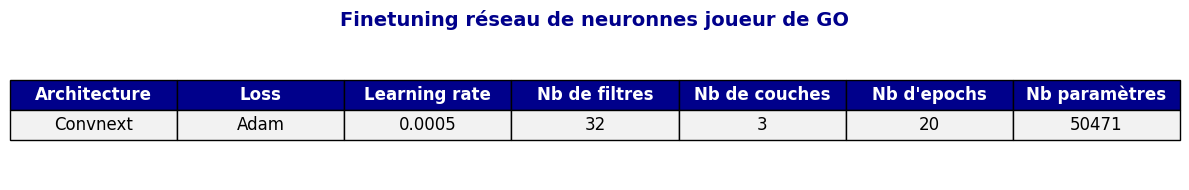

In [ ]:
plot_summary_table("Convnext","Adam",0.0005,32, 3,20, 50471)


<br/>

## Recherche du meilleur leearning rate

A ce stade de nos tests, nous avons une architecture Convnext, la loss Adam.

Voici les résulats obtenus en modifiant uniquement le learnong rate utilisé pour l'entraînement de notre réseau de neurones :



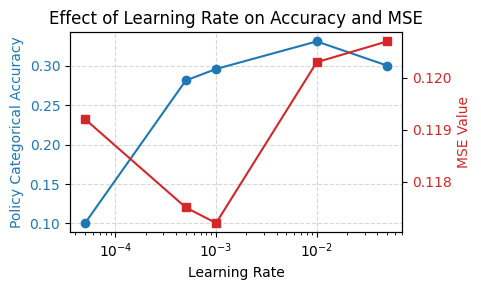

In [ ]:
data = {
    "Learning rate": [0.00005, 0.0005, 0.001,  0.01, 0.05],
    "Policy categorical accuracy": [ 0.1005, 0.2816, 0.2962,  0.3312, 0.3005],
    "MSE value": [ 0.1192, 0.1175,0.1172,  0.1203,  0.1207]
}
df = pd.DataFrame(data)

df = df.sort_values("Learning rate")

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Policy Categorical Accuracy', color=color)
ax1.plot(df["Learning rate"], df["Policy categorical accuracy"], marker='o', color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MSE Value', color=color)
ax2.plot(df["Learning rate"], df["MSE value"], marker='s', color=color, label='MSE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Effect of Learning Rate on Accuracy and MSE")
ax1.grid(True, linestyle='--', alpha=0.5)
plt.xscale('log')

plt.tight_layout()
plt.show()

Nous constatons que la valeur de 0.001 pour le learning rate est la valeure pour laquelle nous obtenons la meilleure combinaison entre un MSE qui reste le plus faible et une très haute valeure de policy categorical accuracy.

**Nous allons donc poser le learning rate égal à 0.001**

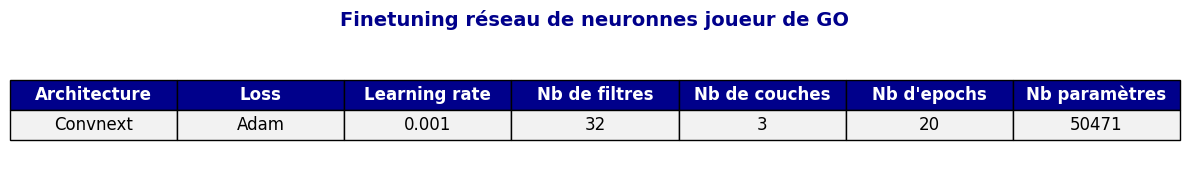

In [ ]:
plot_summary_table("Convnext","Adam",0.001,32,3,20, 50471)

Nous allons maintenant devoir finetuner notre modèle afin de trouver la meilleure combinaison d'hyperparamètres.

<br/>

# Finetune du modèle à la recherche des meilleurs hyperparamètres

Nous allons jouer sur les paramètres suivants ;
* Learning rate
* Nombre d'epochs
* Batch size
* Nombre de filtres  
* Nombre de blocks de convnext

<br/>




## Recherche du nombre de filtres

Les filtres dans les couches du réseau COnvenxt détectent des motifs visuels.

Augmenter le nombre de filtres permet au modèle de capturer des motifs plus complexes, mais :

* Cela augmente le nombre de paramètres.

* Cela demande plus de données et plus d’epochs pour converger.

Il faut donc trouver le juste milieu entre le nombre de filtres, le nombre de couches du réseau afin de rester de ne pas dépasser l'unique contrainte qui nous a été imposée à savoir le nombre de paramètres ne doit pas dépasser le nombre de 100 000.

La statégie utilisée dans le réseau Convnext ci dessous est donc de commencer dans les premières couches par un petit nombre de filtres. On augmente le nombre de filtres au fir et à mesure que lo'n evolue dans les couches les plus profondes afin de détecter les stratégies les plus complexes.

Nous allons également diminuer la taille du réseau de convolution en la faisant passer de 7 à 3 afin de pouvoir augmenter un peu le nombre de couches du réseau et de maximiser les chances du réseau d'apprendre des combinaisons complexes.



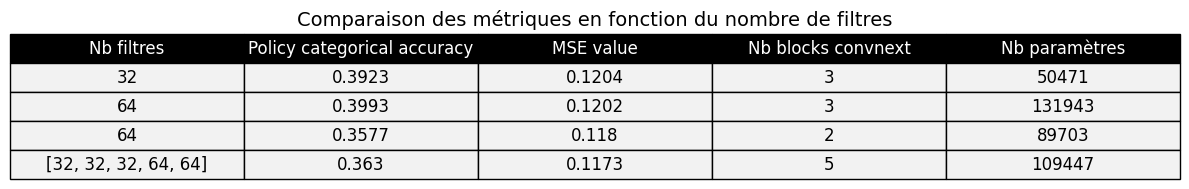

In [ ]:

data = {
    "Nb filtres": [32,64, 64, [32, 32, 32, 64, 64]],
    "Policy categorical accuracy": [0.3923, 0.3993,0.3577, 0.3630],
    "MSE value": [0.1204, 0.1202,0.118, 0.1173],
    "Nb blocks convnext": [3, 3, 2, 5],
    "Nb paramètres": [50471, 131943, 89703,  109447]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')  # Hide axes

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center'
)

for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.set_text_props(color='white')
        cell.set_facecolor('black')
    else:
        cell.set_facecolor('#f2f2f2')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

plt.title("Comparaison des métriques en fonction du nombre de filtres", fontsize=14, pad=10)
plt.tight_layout()
plt.show()



L'augmentation du nombre de filtres de 32 à 64 n'améliore pas de manière significative nos métriques mais a un impact trop fort sur le nombre de paramètres que nous ne pouvons pas garder en l'état.

Nous pouvons faire plusieurs constats à partir de ces résultats  🇰
Nous constatons que le nombre de blocks est essentiel pour avoir un réseau de neurone performant au vue de son impact sur les score et notamment la policy categorical accuracy.

Ce sera donc notre point de départ pour définir les filtres. Nous positionnerons les filtres pour un minimum de blocks de 5.

**Or la seule façon de garder un nombre de couches à 5 du réseau convolutionnel est d'appliquer un nombre de filtres de plus en plus grand au fur et à mesure que les couches deviennent profondes.**




## Recherche du nombre d'epochs

Nous allons voir de quel impact a le fait d'augmenter considérablement le nombre d'epochs sur le MSE et la policy categorical accuracy.

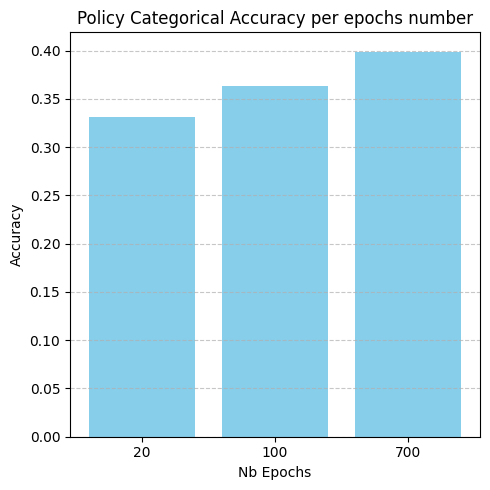

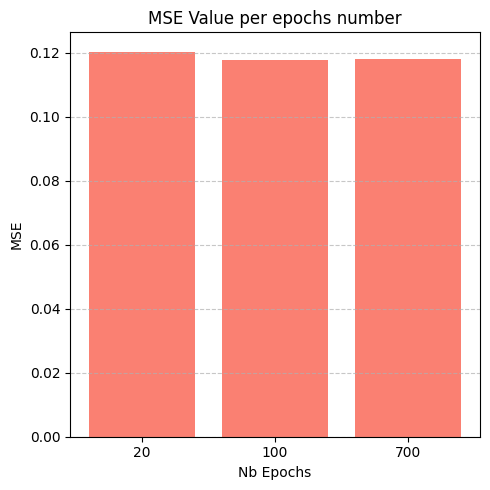

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# On crée DataFrame avec les données observées après tests
data = {
    "Nb Epochs": ["20", "100", "700"],
    "Policy categorical accuracy": [0.3312, 0.363, 0.3989],
    "MSE value": [0.1203,0.1177, 0.118]
}


df = pd.DataFrame(data)

# Plot 1: Policy categorical accuracy
plt.figure(figsize=(5, 5))
plt.bar(df["Nb Epochs"], df["Policy categorical accuracy"], color='skyblue')
plt.title("Policy Categorical Accuracy per epochs number")
plt.ylabel("Accuracy")
plt.xlabel("Nb Epochs")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: MSE Value
plt.figure(figsize=(5, 5))
plt.bar(df["Nb Epochs"], df["MSE value"], color='salmon')
plt.title("MSE Value per epochs number")
plt.ylabel("MSE")
plt.xlabel("Nb Epochs")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le nombre d'epochs a bien entendu un impact primordial sur le MSE et la policy categorical accuracy. En effet plus le réseau s'entraîne et plus il apprend et mieux il jouera par la suite.

**Nous allons donc positionner à 1000 le nombre d'epochs afin d'avoir un réseau performant sans pour autant avoir un côut d'apprentissage trop élevé.**

<br/>





# Conclusion

Voici donc les modifications apportées au réseau initial afin de développer le réseau de neurones pouvant être compétitif au jeu du GO :

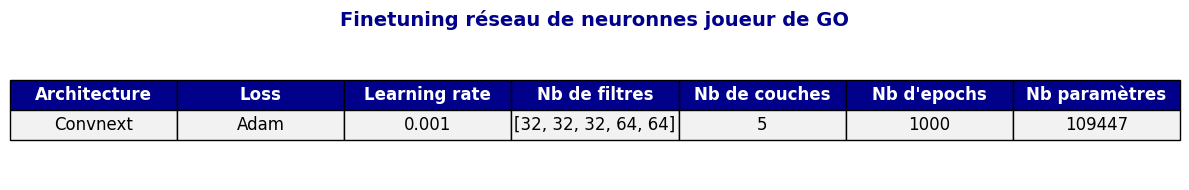

In [ ]:
plot_summary_table("Convnext","Adam",0.001,[32, 32, 32, 64, 64],5, 1000, 109447)

In [ ]:
# @title
!jupyter nbconvert --to html --no-input SophieMendes_Rapport_Golois2025.ipynb

[NbConvertApp] Converting notebook SophieMendes_Rapport_Golois2025.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 753676 bytes to SophieMendes_Rapport_Golois2025.html
